In [4]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

data=np.loadtxt(open('train.csv', "rb"), delimiter=",", skiprows=1)

data.shape





(42000, 785)

In [6]:
data[:,1:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
test=np.loadtxt(open('test.csv', "rb"), delimiter=",", skiprows=1)
test.shape


(28000, 784)

In [4]:
target=data.label
train=data.drop(['label'],axis=1)
test=pd.read_csv('test.csv')


In [3]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000,), random_state=1)
score=cross_val_score(clf,train,target)


KeyboardInterrupt: 

In [35]:
score

array([0.95201371, 0.9532076 , 0.95285041])

In [36]:
clf.fit(train, target)   

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
sub=pd.DataFrame()
sub['ImageId']=np.arange(start=1,stop=(len(test)+1))
sub['Label']=clf.predict(test)
sub.to_csv("submission.csv",index=False)

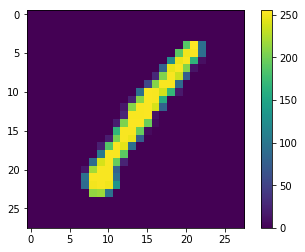

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.imshow(np.array(train.iloc[0]).reshape(28,28))

plt.colorbar()


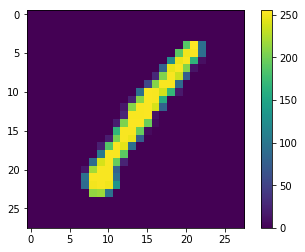

In [17]:
plt.imshow(np.array(train.iloc[0]).reshape(28,28))
plt.colorbar()
plt.gca().grid(False)